# 7.2.2  Ομαδοποιήσεις σε Κοινότητες Δικτύων Αναφορών Χρηστών

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import json 
import os
import imp
import networkx as nx
from collections import Counter
import itertools as it
import seaborn as sns
# sns.set()
sns.set_style("white")
sns.set_style("ticks") 
%load_ext autoreload

import matplotlib.pyplot as plt
%matplotlib inline
import random


#pip install --user python-louvain
import community

In [2]:
GG={}
import glob,os
fildir='/home/dell/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'

os.chdir(fildir)
graphnames=glob.glob('*.gpic')
if len(graphnames)==0:
    print 'No graphs'
for grns in graphnames:
    ww=int(grns.split('_')[-1].split('.')[0])
    G=nx.read_gpickle(grns)
    
    G.name="G_%s" %ww
    GG[ww]=G

k=1
for ww in sorted(GG.keys()):
    print "The number %i cut mentions network has %i nodes and %i edges" %(k,len(GG[ww].nodes()),len(GG[ww].edges()))
    k=k+1

The number 1 cut mentions network has 23868 nodes and 22304 edges
The number 2 cut mentions network has 2358 nodes and 2278 edges
The number 3 cut mentions network has 720 nodes and 613 edges
The number 4 cut mentions network has 351 nodes and 261 edges
The number 5 cut mentions network has 206 nodes and 131 edges
The number 6 cut mentions network has 113 nodes and 74 edges
The number 7 cut mentions network has 78 nodes and 49 edges
The number 8 cut mentions network has 50 nodes and 30 edges
The number 9 cut mentions network has 37 nodes and 22 edges
The number 10 cut mentions network has 28 nodes and 15 edges
The number 11 cut mentions network has 23 nodes and 12 edges
The number 12 cut mentions network has 19 nodes and 10 edges
The number 13 cut mentions network has 16 nodes and 8 edges
The number 14 cut mentions network has 12 nodes and 6 edges
The number 15 cut mentions network has 10 nodes and 5 edges
The number 16 cut mentions network has 8 nodes and 4 edges
The number 17 cut men

In [3]:
ddg=[]
sor=sorted(GG)
for ij in range(len(sor)-1):
    i=sor[ij]
    
    j=sor[ij+1]
    if GG[i].nodes()==GG[j].nodes() and GG[i].edges()==GG[j].edges():
        print i,j
        ddg.append(i)  
print ddg,len(ddg)

[] 0


In [5]:
lscc=[]
lsm=[]
for k,G in GG.items():
    G=nx.Graph(G)
    partition = community.best_partition(G)
    mod = community.modularity(partition,G)
    size = float(len(set(partition.values())))
    lscc.append(size)
    lsm.append(mod)
    
print lscc,len(lscc)
print lsm,len(lsm)
nGG=[]
for k,i in GG.items():
    nGG.append(i.name)
print nGG

[3503.0, 459.0, 183.0, 105.0, 77.0, 42.0, 30.0, 20.0, 3.0, 13.0, 11.0, 9.0, 8.0, 6.0, 5.0, 4.0, 2.0, 1.0, 15.0] 19
[0.9428035036405669, 0.9298416259848212, 0.9508760767000848, 0.9652407166622459, 0.966862307409039, 0.947192047242088, 0.9361797389938491, 0.9096252230814992, 0.6656560222993789, 0.8677526753864448, 0.8582544378698225, 0.8351105147941529, 0.8285439776399686, 0.7874038026256225, 0.758290395032369, 0.7194335667101776, 0.49994898479746963, 0.0, 0.8843823479844957] 19
['G_1', 'G_2', 'G_3', 'G_4', 'G_5', 'G_6', 'G_7', 'G_8', 'G_44', 'G_10', 'G_11', 'G_12', 'G_13', 'G_14', 'G_15', 'G_16', 'G_49', 'G_50', 'G_9']


In [6]:
ddd=zip(nGG,lscc,lsm)
print ddd

[('G_1', 3503.0, 0.9428035036405669), ('G_2', 459.0, 0.9298416259848212), ('G_3', 183.0, 0.9508760767000848), ('G_4', 105.0, 0.9652407166622459), ('G_5', 77.0, 0.966862307409039), ('G_6', 42.0, 0.947192047242088), ('G_7', 30.0, 0.9361797389938491), ('G_8', 20.0, 0.9096252230814992), ('G_44', 3.0, 0.6656560222993789), ('G_10', 13.0, 0.8677526753864448), ('G_11', 11.0, 0.8582544378698225), ('G_12', 9.0, 0.8351105147941529), ('G_13', 8.0, 0.8285439776399686), ('G_14', 6.0, 0.7874038026256225), ('G_15', 5.0, 0.758290395032369), ('G_16', 4.0, 0.7194335667101776), ('G_49', 2.0, 0.49994898479746963), ('G_50', 1.0, 0.0), ('G_9', 15.0, 0.8843823479844957)]


In [7]:
cdf=pd.DataFrame(ddd)
cdf.columns = ['cut mention graph', 'communities','modularity']
cdf['cut-off values']=GG.keys()
cdf=cdf.sort(['cut-off values'], ascending=[True])
cdf

,cut mention graph,communities,modularity,cut-off values
0,G_1,3503.0,0.942804,1
1,G_2,459.0,0.929842,2
2,G_3,183.0,0.950876,3
3,G_4,105.0,0.965241,4
4,G_5,77.0,0.966862,5
5,G_6,42.0,0.947192,6
6,G_7,30.0,0.936180,7
7,G_8,20.0,0.909625,8
18,G_9,15.0,0.884382,9
9,G_10,13.0,0.867753,10


In [8]:
cdf.to_pickle("/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df7_2_2")
# cdf.to_pickle("/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/dataframes/df7_2_2")

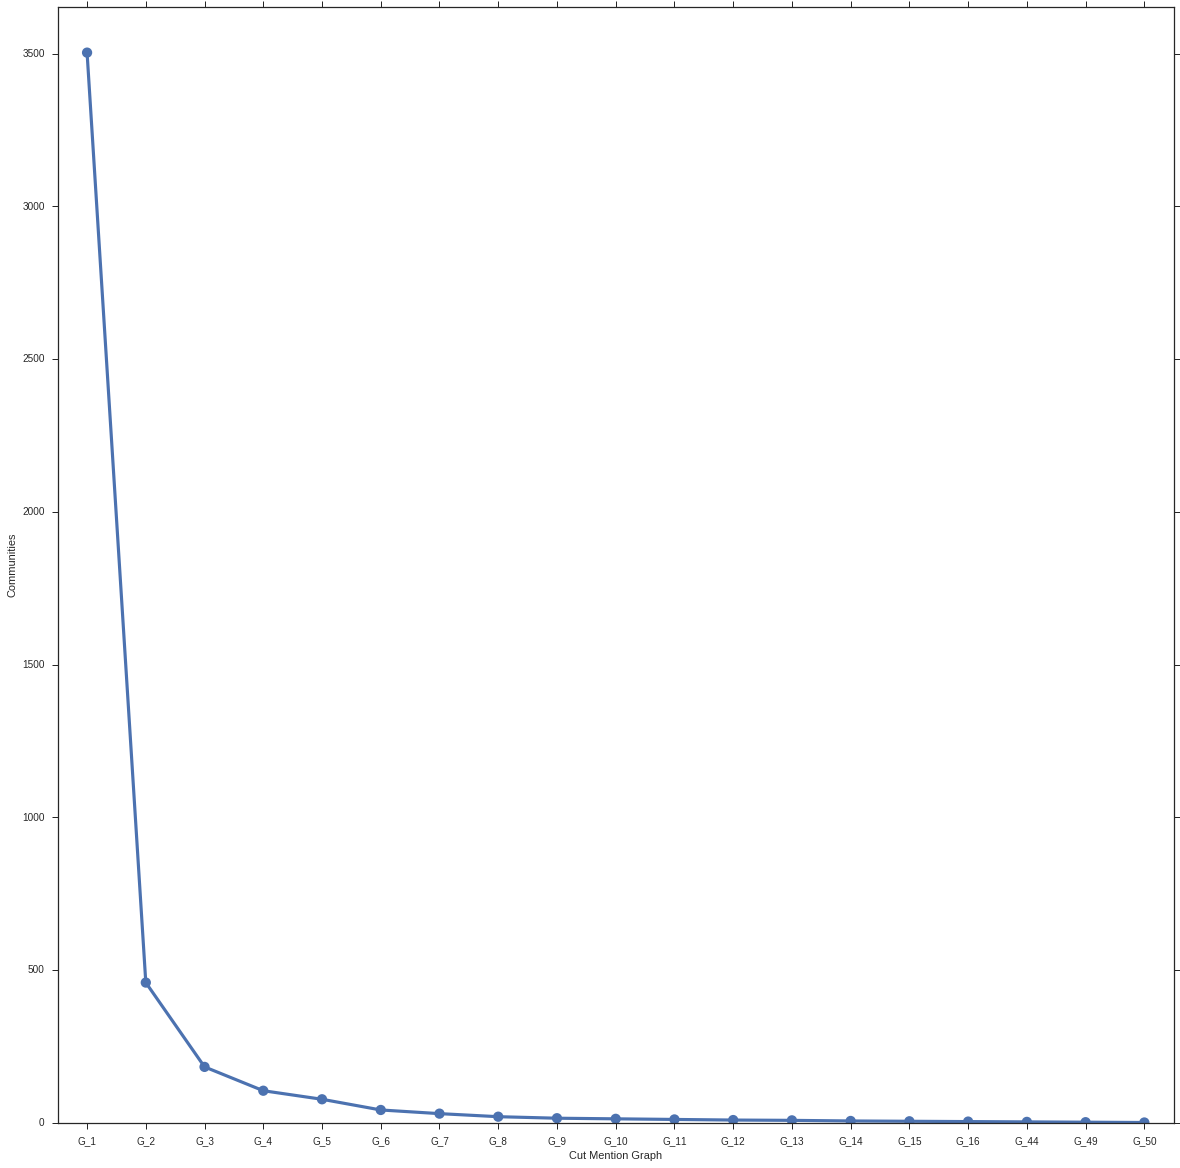

In [9]:
x = cdf["cut mention graph"]
y = cdf["communities"]
plt.figure(figsize=(20,20))

ax=sns.pointplot(x, y)
a1=ax.set(xlabel='Cut Mention Graph', ylabel='Number of Communities')

a3=ax.set(ylim=(0,max(lscc)+150))



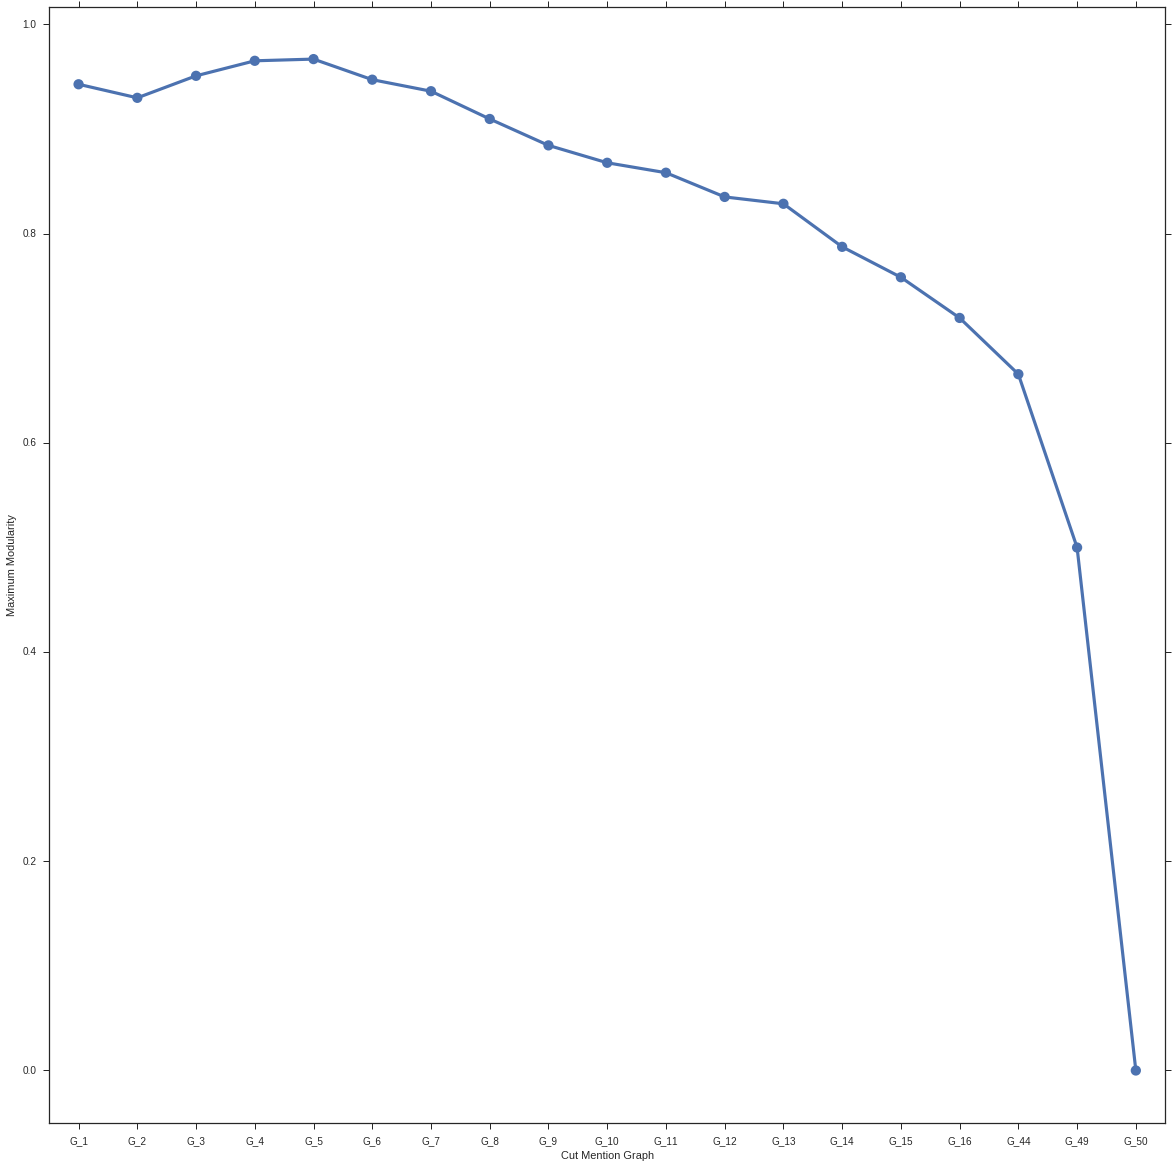

In [10]:
x = cdf["cut mention graph"]
y = cdf["modularity"]
plt.figure(figsize=(20,20))

ax=sns.pointplot(x, y)
a1=ax.set(xlabel='Cut Mention Graph', ylabel='Maximum Modularity')

a3=ax.set(ylim=(-0.05,max(lsm)+0.05))



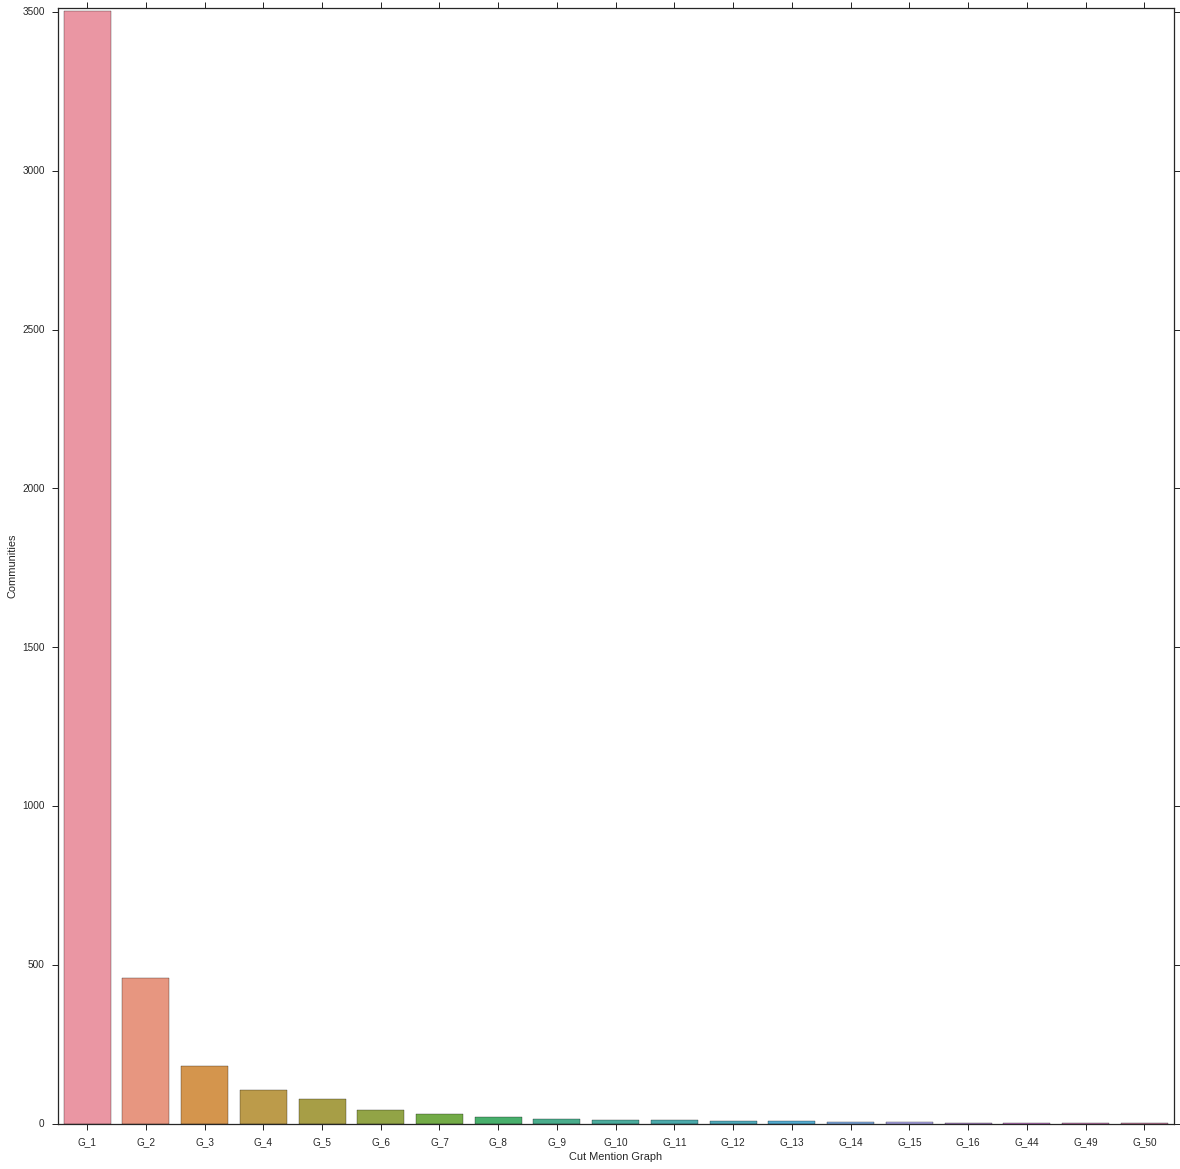

In [11]:
x = cdf["cut mention graph"]
y = cdf["communities"]
plt.figure(figsize=(20,20))

ax=sns.barplot(x, y)
a1=ax.set(xlabel='Cut Mention Graph', ylabel='Communities')

a3=ax.set(ylim=(0,max(lscc)+10))



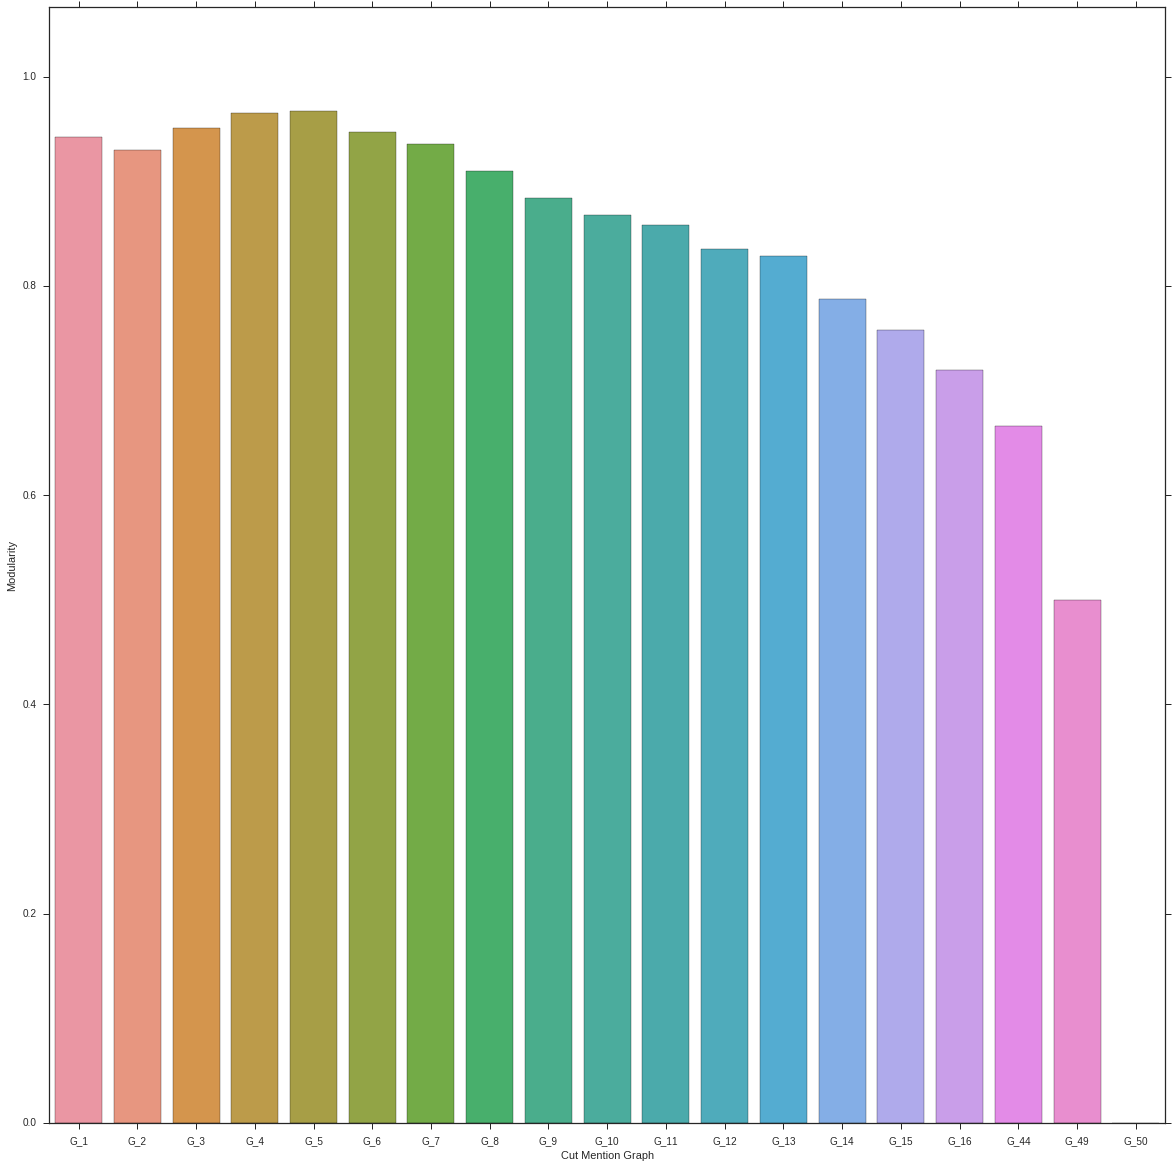

In [13]:
x = cdf["cut mention graph"]
y = cdf["modularity"]
plt.figure(figsize=(20,20))

ax=sns.barplot(x, y)
a1=ax.set(xlabel='Cut Mention Graph', ylabel='Maximum Modularity')

a3=ax.set(ylim=(0,max(lsm)+0.1))

